In [293]:
import pandas as pd
import requests
import pprint
import json
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('max_columns', None)

In [294]:
key = '9fe889f0a043201cfff25ac191ccad9cd11143a2'

start = 'https://api.census.gov/data/2018/abstcb?get='

# params = ''

end = f'&for=us:*&key={key}'

# response = requests.get(start+params+end)
# data = response.json()



In [295]:
params = 'RACE_GROUP,RACE_GROUP_LABEL,IMPACTWF_P,TECHUSE,TECHUSE_LABEL,RCPPDEMP'

#print(start+params+end)
response = requests.get(start+params+end)
data = response.json()
test = data[0]

df = pd.DataFrame(data = data[1:], columns = data[0])
df['RCPPDEMP'] = df['RCPPDEMP'].astype(float)


race = df.groupby(['RACE_GROUP_LABEL','TECHUSE_LABEL'])['RCPPDEMP'].agg(sum).to_frame().reset_index()
#race.index 

race = race[race['TECHUSE_LABEL'].str.contains('Did not use')]
race = race[~race['RACE_GROUP_LABEL'].isin(['Total', 'Minority', 'Nonminority', 'Asian', 'White'])]
#race['RCCPDEMP'] = race['RCCPDEMP']

#race.RCPPDEMP = race.RCPPDEMP.apply(lambda x: (x - race.RCPPDEMP.min())/(race.RCPPDEMP.max() - race.RCPPDEMP.min()))
race

,RACE_GROUP_LABEL,TECHUSE_LABEL,RCPPDEMP
1,American Indian and Alaska Native,Artificial Intelligence: Did not use,24661877.0
9,American Indian and Alaska Native,Cloud-Based: Did not use,14614214.0
17,American Indian and Alaska Native,Robotics: Did not use,26026636.0
25,American Indian and Alaska Native,Specialized Equipment: Did not use,19044927.0
33,American Indian and Alaska Native,Specialized Software: Did not use,12909100.0
83,Black or African American,Artificial Intelligence: Did not use,87494472.0
91,Black or African American,Cloud-Based: Did not use,40983728.0
99,Black or African American,Robotics: Did not use,91392426.0
107,Black or African American,Specialized Equipment: Did not use,67720154.0
115,Black or African American,Specialized Software: Did not use,43777852.0


In [296]:
race.loc[:, 'TECHUSE_LABEL'] = race['TECHUSE_LABEL'].apply(lambda x: x.replace(': Did not use', ''))
race

,RACE_GROUP_LABEL,TECHUSE_LABEL,RCPPDEMP
1,American Indian and Alaska Native,Artificial Intelligence,24661877.0
9,American Indian and Alaska Native,Cloud-Based,14614214.0
17,American Indian and Alaska Native,Robotics,26026636.0
25,American Indian and Alaska Native,Specialized Equipment,19044927.0
33,American Indian and Alaska Native,Specialized Software,12909100.0
83,Black or African American,Artificial Intelligence,87494472.0
91,Black or African American,Cloud-Based,40983728.0
99,Black or African American,Robotics,91392426.0
107,Black or African American,Specialized Equipment,67720154.0
115,Black or African American,Specialized Software,43777852.0


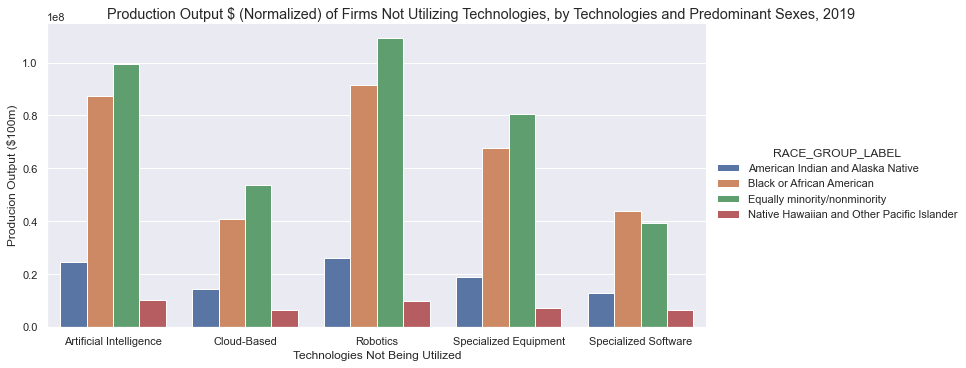

In [299]:
import seaborn as sns
graph = sns.catplot(x = 'TECHUSE_LABEL', y = 'RCPPDEMP', hue = 'RACE_GROUP_LABEL', data = race, kind = 'bar', height=5, aspect=2)
graph.fig.suptitle('Production Output $ (Normalized) of Firms Not Utilizing Technologies, by Technologies and Predominant Sexes, 2019')
graph.set_xlabels('Technologies Not Being Utilized')
graph.set_ylabels('Producion Output ($100m)')

In [194]:
params = 'SEX,SEX_LABEL,IMPACTWF_P,TECHUSE,TECHUSE_LABEL,RCPPDEMP'

#print(start+params+end)
response = requests.get(start+params+end)
data = response.json()
test = data[0]

df = pd.DataFrame(data = data[1:], columns = data[0])
df['RCPPDEMP'] = df['RCPPDEMP'].astype(float)


race = df.groupby(['SEX_LABEL','TECHUSE_LABEL'])['RCPPDEMP'].agg(sum).to_frame().reset_index()
#race.index 

race = race[race['TECHUSE_LABEL'].str.contains('Did not use')]
race = race[~race['SEX_LABEL'].isin(['Total'])]
race.loc[:, 'TECHUSE_LABEL'] = race['TECHUSE_LABEL'].apply(lambda x: x.replace(': Did not use', ''))


#race.RCPPDEMP = race.RCPPDEMP.apply(lambda x: (x - race.RCPPDEMP.min())/(race.RCPPDEMP.max() - race.RCPPDEMP.min()))
sex = race
sex

,SEX_LABEL,TECHUSE_LABEL,RCPPDEMP
1,Equally male/female,Artificial Intelligence,1.039215e+09
9,Equally male/female,Cloud-Based,5.815100e+08
17,Equally male/female,Robotics,1.032981e+09
25,Equally male/female,Specialized Equipment,7.859313e+08
33,Equally male/female,Specialized Software,5.019810e+08
42,Female,Artificial Intelligence,1.370195e+09
50,Female,Cloud-Based,6.781567e+08
58,Female,Robotics,1.371564e+09
66,Female,Specialized Equipment,1.026767e+09
74,Female,Specialized Software,6.412803e+08


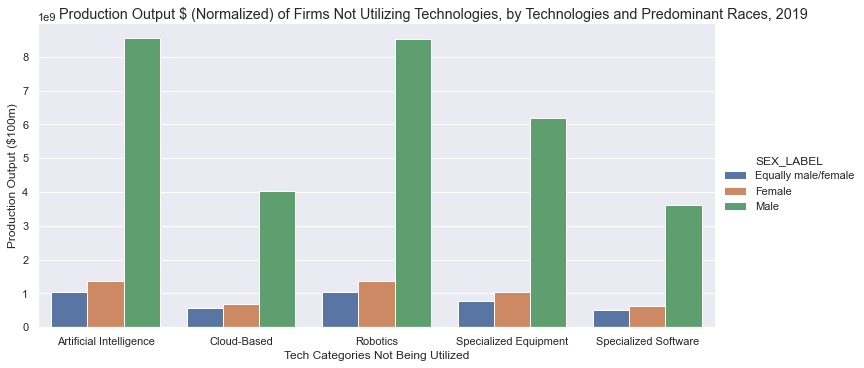

In [287]:
import seaborn as sns
graph = sns.catplot(x = 'TECHUSE_LABEL', y = 'RCPPDEMP', hue = 'SEX_LABEL', data = sex, kind = 'bar', height=5, aspect=2)
graph.fig.suptitle('Production Output $ (Normalized) of Firms Not Utilizing Technologies, by Technologies and Predominant Sexes, 2019')
graph.set_xlabels('Tech Categories Not Being Utilized')
graph.set_ylabels('Production Output ($100m)')

In [270]:
params = 'TECHUSE,TECHUSE_LABEL,NSFSZFI,NSFSZFI_LABEL,FIRMPDEMP'

data = requests.get(start+params+end).json()
test = data[0]

df = pd.DataFrame(data = data[1:], columns = data[0])
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)
df

,TECHUSE,TECHUSE_LABEL,NSFSZFI,NSFSZFI_LABEL,FIRMPDEMP,us
0,T1E03B01,Artificial Intelligence: Did not use,001,All firms,4336113,1
1,T1E03B02,"Artificial Intelligence: Tested, but did not u...",001,All firms,21056,1
2,T1E03B03,Artificial Intelligence: Low use,001,All firms,75095,1
3,T1E03B04,Artificial Intelligence: Moderate use,001,All firms,46424,1
4,T1E03B05,Artificial Intelligence: High use,001,All firms,20212,1
5,T1E03B06,Artificial Intelligence: Don't know,001,All firms,251786,1
6,T1E03B99,Artificial Intelligence: Total use,001,All firms,141731,1
7,T1E03BA9,Artificial Intelligence: Total Reporting,001,All firms,4750687,1
8,T2E03B01,Cloud-Based: Did not use,001,All firms,2931192,1
9,T4E03B05,Robotics: High use,001,All firms,16510,1


In [271]:
dnu = df.groupby(['NSFSZFI_LABEL','TECHUSE_LABEL'])['FIRMPDEMP'].agg(sum).reset_index()
dnu = dnu[dnu['TECHUSE_LABEL'].str.contains('Did not use')]
dnu

,NSFSZFI_LABEL,TECHUSE_LABEL,FIRMPDEMP
0,All firms,Artificial Intelligence: Did not use,4336113
8,All firms,Cloud-Based: Did not use,2931192
16,All firms,Robotics: Did not use,4517555
24,All firms,Specialized Equipment: Did not use,3658991
32,All firms,Specialized Software: Did not use,2641604
40,Firms with 1 to 9 employees,Artificial Intelligence: Did not use,3068600
48,Firms with 1 to 9 employees,Cloud-Based: Did not use,2161211
56,Firms with 1 to 9 employees,Robotics: Did not use,3209074
64,Firms with 1 to 9 employees,Specialized Equipment: Did not use,2651938
72,Firms with 1 to 9 employees,Specialized Software: Did not use,1961274


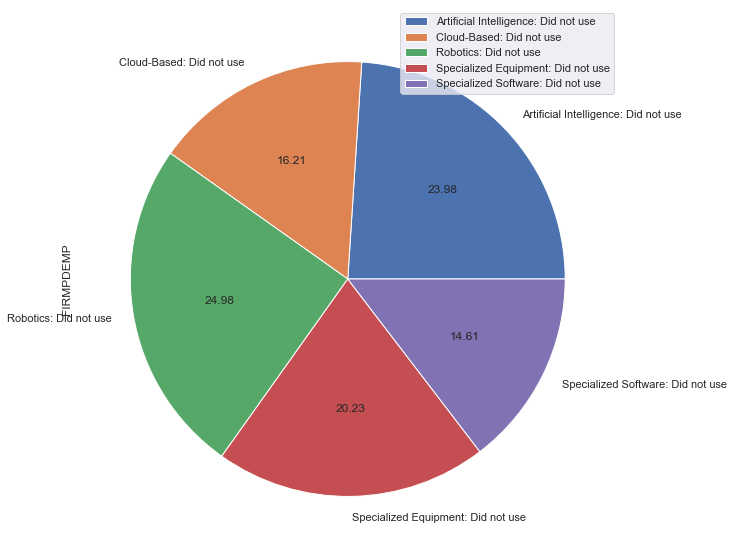

In [272]:
all_firms = dnu[dnu['NSFSZFI_LABEL'].str.contains('All firms')]
all_firms = all_firms.set_index('TECHUSE_LABEL')
test = all_firms.plot(kind='pie', y='FIRMPDEMP', x = 'TECHUSE_LABEL', autopct = '%.2f', figsize=(20, 10))

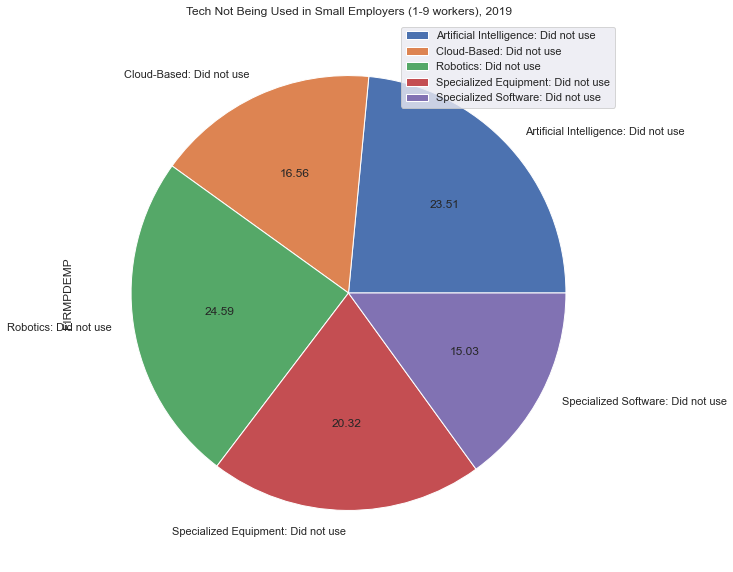

In [275]:
firms9 = dnu[dnu['NSFSZFI_LABEL'].str.contains('Firms with 1 to 9 employees')]
firms9 = firms9.set_index('TECHUSE_LABEL')
test = firms9.plot(title = 'Tech Not Being Used in Small Employers (1-9 workers), 2019', kind='pie', y='FIRMPDEMP', x = 'TECHUSE_LABEL', autopct = '%.2f', figsize=(20, 10))

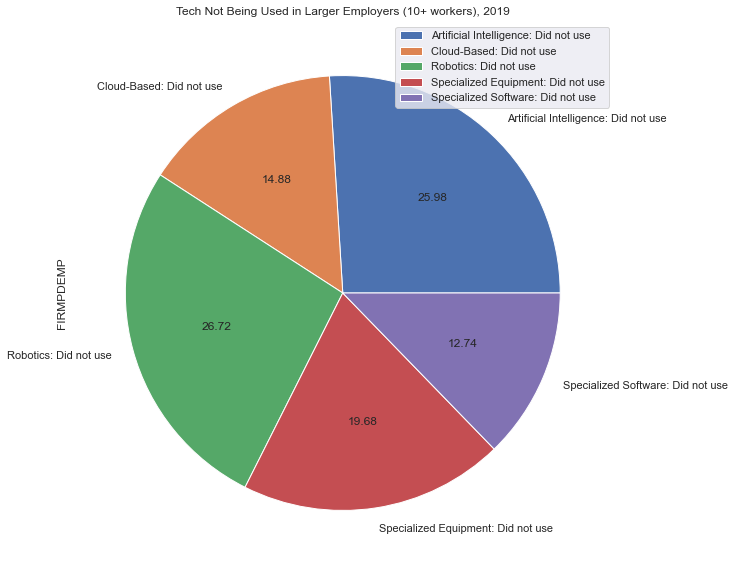

In [278]:
lf = dnu[dnu['NSFSZFI_LABEL'].str.contains('Firms with 10 employees or more')]
lf = lf.set_index('TECHUSE_LABEL')
test = lf.plot(title = 'Tech Not Being Used in Larger Employers (10+ workers), 2019', kind='pie', y='FIRMPDEMP', x = 'TECHUSE_LABEL', autopct = '%.2f', figsize=(20, 10))

In [247]:
params = params = 'TECHUSE,TECHUSE_LABEL,NSFSZFI,NSFSZFI_LABEL,IMPACTWF_P,IMPACTWF_P_LABEL,FIRMPDEMP'

data = requests.get(start+params+end).json()
test = data[0]

df = pd.DataFrame(data = data[1:], columns = data[0])
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)
df

,TECHUSE,TECHUSE_LABEL,NSFSZFI,NSFSZFI_LABEL,IMPACTWF_P,IMPACTWF_P_LABEL,FIRMPDEMP,us
0,00,All firms,001,All firms,T2E25L06,Cloud-Based: Did not change skill level of wor...,102342,1
1,00,All firms,001,All firms,T2E25L07,Cloud-Based: Increased STEM skills of workers ...,36276,1
2,00,All firms,001,All firms,T2E25L08,Cloud-Based: Decreased STEM skills of workers ...,0,1
3,00,All firms,001,All firms,T2E25L09,Cloud-Based: Did not change STEM skills of wor...,67517,1
4,00,All firms,001,All firms,T2E25L10,"Cloud-Based: Not applicable, did not employ wo...",47384,1
5,00,All firms,001,All firms,T2E25L99,Cloud-Based: Total Reporting,152386,1
6,00,All firms,001,All firms,T3E28L01,Specialized Software: Increased number of work...,27180,1
7,00,All firms,001,All firms,T3E28L02,Specialized Software: Decreased number of work...,5629,1
8,00,All firms,001,All firms,T3E28L03,Specialized Software: Did not change number of...,152506,1
9,00,All firms,001,All firms,T3E28L04,Specialized Software: Increased skill level of...,55169,1


<AxesSubplot:title={'center':'Impact on Employers Implementing Cloud-Based Technology, 2019'}>

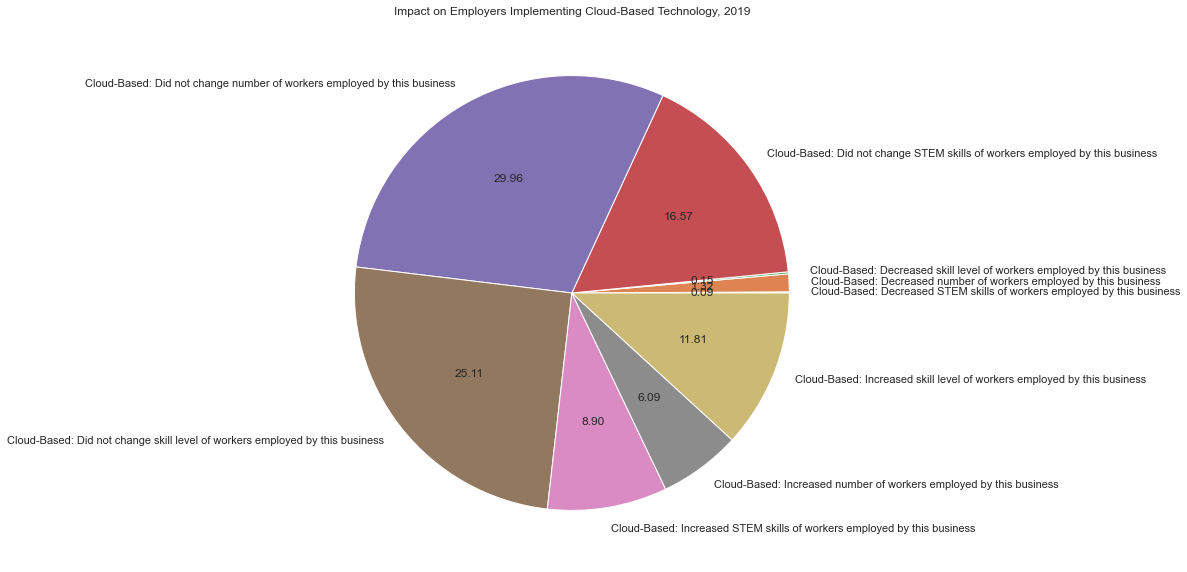

In [269]:
dnu_c = df.groupby(['TECHUSE_LABEL','IMPACTWF_P_LABEL'])['FIRMPDEMP'].agg(sum).reset_index()
dnu_c = dnu_c[dnu_c['IMPACTWF_P_LABEL'].str.contains('Cloud-Based')]
dnu_c = dnu_c[~dnu_c['IMPACTWF_P_LABEL'].str.contains('Total')]
dnu_c = dnu_c[~dnu_c['IMPACTWF_P_LABEL'].str.contains('Not applicable')]
dnu_c.set_index('IMPACTWF_P_LABEL', inplace = True)
dnu_c.plot.pie(title = 'Impact on Employers Implementing Cloud-Based Technology, 2019', y='FIRMPDEMP', ylabel = '', x = 'TECHUSE_LABEL', autopct = '%.2f', figsize=(20, 10), legend = False)